# Project 1 - Quality control for a clock manufacturing company [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

There is an imaginary clock manufacturing company that wants you to develop software to check the quality of its products. The clocks produced by this company have **two hands**:

- the small hand is **red** and indicates the **hour**,
- the long hand is **green** and indicates the minutes.

We refer to these as *the hour hand* and *the minute hand* respectively. These clocks do not have any other hands (although some other clocks have a third hand indicating the seconds).

It is very important for these hands to be properly aligned. For example, if the hour hand is pointing to the hour `3` (being horizontal and pointing toward right), the minute hand should be pointing toward the hour `12` (vertical and pointing upward). Another example is when the hour hand is pointing to the hour `1:30` (making a 45 degree angle from the vertical line), the minute hand should be pointing toward hour `6` (vertical and downward).

| Correct `1:30`, the hour hand is halfway between 1 and 2. | Incorrect `1.30`, the hour hand is too close to 1. |
|:--:|:--:|
| ![Correct 1.30](graphics/one_thirty_correct.png) | ![Incorrect 1.30](graphics/one_thirty_incorrect.png) |

Due to production imprecisions, this is not the case all the time. Your software package will **quantify the potential misalignments** and help the company to return the faulty clocks back to the production line for re-adjustment.

You will achieve this goal in several steps during this project. Most steps can be done independently. Therefore, if you are struggling with one part, you can move on to other tasks and gain the marks allocated to them.

For most tasks, under "✅ *Testing:*", you will be given instructions on how to check that your function works as it should, even if you haven't done the previous task.


---

## Task 1: Reading images into NumPy arrays [3 marks]

The company takes a picture of each clock, and saves it as a PNG image of 101x101 pixels. The folder `clock_images` contains the photos of all the clocks you need to control today.

In a PNG colour image, the colour of each pixel can be represented by 3 numbers between 0 and 1, indicating respectively the amount of **red**, the amount of **green**, and the amount of **blue** needed to make this colour. This is why we refer to colour images as **RGB** images.

- If all 3 values are 0, the pixel is black.
- If all 3 values are 1, the pixel is white.
- If all 3 values are the same, the pixel is grey. The smaller the values, the darker it is.
- Different amounts of red, green, and blue correspond to different colours.

For example, select a few colours [using this tool](https://doc.instantreality.org/tools/color_calculator/), and check the RGB values for that colour in the *RGB Normalized decimal* box. You should see that, for instance, to make yellow, we need a high value of red, a high value of green, and a low value of blue.

If you'd like more information, [this page](https://web.stanford.edu/class/cs101/image-1-introduction.html) presents a good summary about RGB images.

---

🚩 Study the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) for the functions `imread()` and `imshow()` from `matplotlib.pyplot`. Then, write code below to read the `clock_0` image from `batch_0` into a NumPy array, and display the image.

You will obtain a NumPy array with shape `(101, 101, 3)`, i.e. an array which is 3 layers deep. Each of these layers is a 101x101 array, where the elements represent the intensity of red, green, and blue respectively, for each pixel. For example, the element of this array with index `[40, 20, 2]` corresponds to the amount of blue in the pixel located in row 40, column 20.

Create a second figure, with 3 sets of axes, and use `imshow()` to display each layer separately on its own set of axes. Label your figures appropriately to clearly indicate what each image is showing.

*Note: you can use `ax.imshow()` to display an image on the axes `ax`, the same way we use `ax.plot()`.*

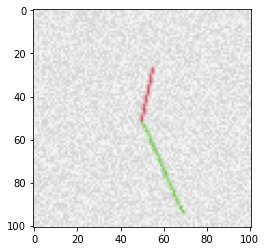

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats # Linear regression
import os   # read all png files in a given path
import datetime # get current date and time



clock_0 = plt.imread("clock_images\\batch_0\\clock_0.png") # Read in the image as a array
plt.imshow(clock_0)   # Display the picture 


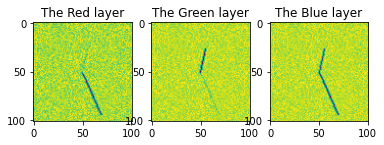

In [147]:
figure, ax = plt.subplots(1,3)  # Create three sets of axes
color = ["Red","Green","Blue"]
# Draw one layer a time
for i in [0,1,2]:
    ax[i].imshow(clock_0[:,:,i]) 
    ax[i].set_title(f"The {color[i]} layer")

# Remark： The darkest are the pixels with smallest intensities.

---
## Task 2: Clean up the images to extract data [6 marks]

Later in Task 3, we will use **linear regression** to find the exact position of both clock hands. To perform linear regression, we will need the **coordinates of the pixels** belonging to each hand; then, we will be able to fit a line through these pixels.

This task is concerned with extracting the correct pixel coordinates from the image.

---

🚩 Write a function `get_clock_hands(clock_RGB)`, which takes one input argument `clock_RGB`, a NumPy array of size 101x101x3 representing an RGB image of a clock, and returns 2 NumPy arrays with 2 columns each, such that:

- In the first array, each row corresponds to the `[row, column]` index of a pixel belonging to the **hour hand**.
- In the second array, each row corresponds to the `[row, column]` index of a pixel belonging the **minute hand**.

The goal is to obtain, for each hand, a collection of `[row, column]` coordinates which indicate where on the picture is the clock hand. You will need to figure out a way to decide whether a given pixel belongs to the hour hand, the minute hand, or neither.


---

***Important note:*** the pictures all contain some amount of noise and blur. Depending on how you decide to count a certain pixel or not as part of a clock hand, your function will pick up different pixels. There isn't just one possible set of pixel coordinates to pick up for a given image -- the most important thing is that the pixels you extract **only** belong to one of the two hands, and not to the background for example. This will ensure that you can use linear regression efficiently.

---

✅ *Testing:* For example, for the tiny 7x7 clock below (a 7x7 pixel image is available in the `testing` folder for you to try your function):

| Clock | Hour hand | Minute hand |
|:--:|:--:|:--:|
| <img src="graphics/task2.png" alt="Task 2 example" style="width: 100px;"/> | [[1, 1]<br/> [2, 2]] | [[3, 3]<br/> [4, 3]<br/> [4, 4]<br/> [5, 4]<br/> [6, 5]] |

clock_images\batch_0
clock_images\batch_1
clock_images\batch_2
clock_images\batch_3
clock_images\batch_4


(array([1.90000e+01, 9.46000e+02, 3.00400e+03, 3.11200e+03, 2.06200e+03,
        1.54100e+03, 5.51800e+03, 9.75700e+03, 6.30073e+05, 8.74118e+05]),
 array([0.16862746, 0.24862745, 0.32862747, 0.40862745, 0.48862746,
        0.5686275 , 0.64862746, 0.72862744, 0.8086274 , 0.88862747,
        0.96862745], dtype=float32),
 <BarContainer object of 10 artists>)

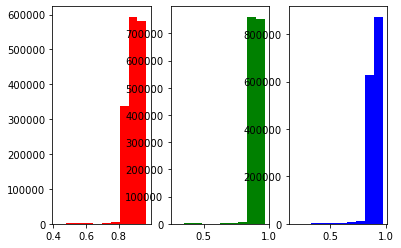

In [148]:
##########################
# Explorational analysis #
##########################
# To find out the thresold for pixels' intensities, 
# the distribution of intensities of R,G,B pixels will be visualized
batch_total= {}
# store all images in batch 0-4
for i in [0,1,2,3,4]:
    # set the path
    route = "clock_images\\batch_"+str(i)
    print(route)
    filenames = os.listdir(route)
    # read in images
    for name in filenames:
        batch_total[f"batch_{i}_{name[:-4]}"] = plt.imread(os.path.join(route,name))

figure, ax = plt.subplots(1,3)  # Create three sets of axes
#  In 'R_dict' Store all R layers, in 'R_dict_merge' all values in arrays of R-layers
R_dict ={key:value[:,:,0] for (key,value) in batch_total.items()}
R_dict_merge = np.concatenate(list(R_dict.values()),1).reshape(-1) #same as .flatten
ax[0].hist(R_dict_merge,color="red")

# repeated operation as for G layers
G_dict ={key:value[:,:,1] for (key,value) in batch_total.items()}
G_dict_merge = np.concatenate(list(G_dict.values()),1).reshape(-1) 
ax[1].hist(G_dict_merge,color="green")

# repeated operation as for B layers
B_dict ={key:value[:,:,2] for (key,value) in batch_total.items()}
B_dict_merge = np.concatenate(list(B_dict.values()),1).reshape(-1) 
ax[2].hist(B_dict_merge,color="blue")

# In conclusion, we can easily read off the thresolds for pixels' intensities
# The pixels in the RED layers with intensities smaller than 0.6 controls the minutes hand (in green!)
# The pixels in the GREEN layers with intensities smaller than 0.5 controls the minutes hand (in red!)



In [149]:
def get_clock_hands(clock_RGB):
    '''
    Return two arrarys indicating hour, minute hands' pixels respectively, each row corresponds to [row, column] index of a pixel
    
    Input:  clock_RGB (3-layer array) The three layers correspond to R,G,B layers
    
    Output: hour_hand (array) each row corresponds to [row, column] index of a pixel
            minutes_hand (array) '''
    minutes_hand = np.array(np.nonzero(clock_RGB[:,:,0]<0.64)).T # In red layer, the minutes hand pixels have the smallest intensities.
    hour_hand = np.array(np.nonzero(clock_RGB[:,:,1]<0.5)).T   # In Green layer, the hour hand pixedls have the smallest intensities
    return hour_hand,minutes_hand


#Testing with 7x7 image
get_clock_hands(plt.imread("testing/task2_7x7.png"))
#Successful !'''    

            



(array([[1, 1],
        [2, 2]], dtype=int64),
 array([[3, 3],
        [4, 3],
        [4, 4],
        [5, 4],
        [6, 5]], dtype=int64))

---

## Task 3: Calculate the angle of the two hands [9 marks]

Now that we have pixel locations for each hand, we can estimate the **angle** between each hand and the 12 o'clock position. We will use this angle later to determine the time indicated by each hand. For instance, the figure below shows the angle made by the hour hand with the 12 o'clock position.

![Angle between hour hand and 12 o'clock](graphics/angle.png)

---

🚩 Write a function `get_angle(coords)` which takes one input argument, a NumPy array with 2 columns representing `[row, column]` pixel coordinates of one clock hand, exactly like one of the arrays returned by `get_clock_hands()` from Task 2.

- Your function should use these pixel coordinates to find a **line of best fit** using linear regression.
- Then, using this line of best fit, you should determine and **return** the angle between the clock hand and the 12 o'clock position, measured in **radians**.

The angle should take a value between $0$ (inclusive) and $2\pi$ (exclusive) radians, where $0\, \text{rad}$ corresponds to the 12 o'clock position.

---

***Notes:***

- When performing linear regression, you will need to pay particular attention to the case where the clock hand is vertical or almost vertical.
- Beware of the correspondance between `[row, column]` index and `(x, y)` coordinate for a given pixel.
- Note that the meeting point of the 2 clock hands may not be exactly at `[50, 50]`. Some of the pictures have a small offset.
- Partial attempts will receive partial marks. For instance, if you are struggling with using linear regression, or if you don't know how to account for possible offset of the centre, you may receive partial marks if you use a simpler (but perhaps less accurate) method.

---

✅ *Testing:* the files `task3_hourhand.txt` and `task3_minutehand.txt` are provided for you to test your function in the `testing` folder. Use `np.loadtxt()` to read them.

With these coordinates, you should find an angle of approximately 4.2 radians for the hour hand, and 5.7 radians for the minute hand.

In [150]:
def get_angle(coords):
    '''
    Return the angle between each hand and the 12 o'clock position.
    
    Input: coords (array) A two-column-array, with each row  corresponds to [row, column] index of a pixel
    
    Output: angle (float) Takes value from [0,2*pi)'''
    
    # It is argued that one end of the hand is necessarily closer to (50, 50) than the other end
    # Sort the array by y. 
    coords_sorted = coords[coords[:,1].argsort()] #increasing order
    x = coords_sorted[:,0]
    y = coords_sorted[:,1]
    y_left = y[0]
    y_right = y[-1]

    # fit a regression
    slope, intercept = stats.linregress(x,y)[0:2]
    # When slope does not exist, then it is a trivial case to solve the angle.
    if (np.isnan(slope) or slope > 1e+307) and (abs(y_right -50) > abs(y_left - 50)):  # The hand points at 3
        angle = np.pi/2
    if (np.isnan(slope) or slope > 1e+307) and (abs(y_right -50) < abs(y_left - 50)):      # The hand points at 9
        angle = np.pi/2*3    

    # When the slope exist.
    # The trivial case would be slope = 0, in these cases, the length of the hand is relatively larger than the offset
    # If the abs(slope) <= 0.001 , it is treated as 0
    if (slope == 0) and np.mean(x)<50:
        angle = 0
    if (slope == 0) and np.mean(x)>50:
        angle = np.pi
    if slope != 0: # For the common cases, predict x coordinates for further accuracy.
        x = (y - intercept)/slope
        x_left = x[0]
        x_right = x[-1]

        # When the hand land from 12 - 6, the distance between (50,50) and the right end should be larger than that of the left
        right_dist_squared = (x_right - 50)**2 + (y_right - 50)**2
        left_dist_squared = (x_left - 50)**2 + (y_left - 50)**2
        if right_dist_squared > left_dist_squared:
            if slope < 0:
                angle = -1*np.arctan(slope)
            if slope > 0:
                angle = np.pi - np.arctan(slope)
        if right_dist_squared < left_dist_squared:
            if slope < 0:
                angle = -1*np.arctan(slope) + np.pi
            if slope > 0:
                angle = 2*np.pi - np.arctan(slope)
    return(angle)



    

#Testing:
print("Hour Angle",get_angle(np.loadtxt("testing/task3_hourhand.txt")))
print("Minute Angle",get_angle(np.loadtxt("testing/task3_minutehand.txt"))) 

 

Hour Angle 4.182328300908677
Minute Angle 5.64674170379405


---

## Task 4: Visualising the clock [6 marks]

🚩  Use `matplotlib` and your artistic skills to visualise the clock. Write a function `draw_clock(angle_hour, angle_minute)` that takes 2 input arguments, corresponding to the two angles of the clock hands, and draw a clock with the precise location of both hands.

Your plot may include the number associated to hours, a background like a circle, an arrow head for each hand etc.

---

✅ *Testing:* with `angle_hour` set to $\frac{\pi}{3}$ and `angle_minute` set to $\frac{11\pi}{6}$, the hour hand should point exactly at 2, and the minute hand should point exactly at 11.

There is also an example image in the `testing` folder, which was produced entirely with `matplotlib`. This is just to give you an idea of what is possible to do -- you shouldn't attempt to reproduce this particular example, don't hesitate to get creative!

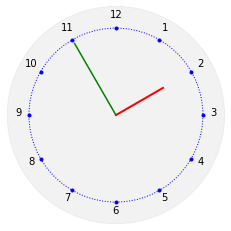

In [151]:
def draw_clock(angle_hour, angle_minute):
    '''
    Draw a clock image given the angles of minute and hour hand between 12 o'clock positon.

    Input: angle_hour (float)
           
           angle_minute (float)'''
    #Draw backgrounds -- two circles and numbers
    circle = plt.Circle((50, 50),50, color='grey',alpha = 0.1)
    circle_inner = plt.Circle((50, 50),40,fill=False,color = "blue",linestyle = ":")
    fig, ax = plt.subplots() 
    ax.set_xlim((0, 100))
    ax.set_ylim((0, 100))
    ax.set_aspect(1)
    ax.add_patch(circle)
    ax.add_patch(circle_inner)
    #Draw 1 - 12 on the inner circle
    for i in range(1,13):
        ax.plot(50 + 40*np.cos(np.pi/6*(3-i)),50 + 40*np.sin(np.pi/6*(3-i)),"b.")
        ax.text(50 + 45*np.cos(np.pi/6*(3-i)),50 + 45*np.sin(np.pi/6*(3-i)),f"{i}",horizontalalignment='center')
    # Draw hands
    ax.plot([50,50+25*np.sin(angle_hour)],[50,50+25*np.cos(angle_hour)],color="red",linewidth=2)
    ax.plot([50,50+38*np.sin(angle_minute)],[50,50+38*np.cos(angle_minute)],color="green",linewidth=1.5)
    ax.axis('off')
#Testing
draw_clock(np.pi/3,11*np.pi/6)


---
## Task 5: Analog to digital conversion [5 marks]

🚩 Write a function `analog_to_digital(angle_hour, angle_minute)` that takes two input arguments, corresponding to the angles formed by each hand with 12 o'clock, and returns the time in digital format. More specifically, the output is a string showing the time in hour and minute in the format `hh:mm`, where `hh` is the hour and `mm` is the minute.

- When the hour is smaller than 10, add a leading zero (e.g. `04:30`).
- When the hour is zero, display `12`.

At this point, your function is not concerned about the imprecision. It should calculate the hour from the hour hand, and the minute from the minute hand, separately.

---
✅ *Testing:* the same angles as in Task 4 should give you `02:55`.

In [152]:
def analog_to_digital(angle_hour, angle_minute):
    digital_hour = int(np.floor(angle_hour/(np.pi/6)))
    digital_minute = int(np.floor(angle_minute/(np.pi/30)))
    
    # Specify all the cases
    if digital_hour == 0:
        digital_hour = 12

    if digital_minute == 60:
        digital_minute = "00"

    if digital_hour < 10:
        digital_hour = "0"+str(digital_hour)
    return(f"{digital_hour}:{digital_minute}")    

#Testing
print(analog_to_digital(np.pi/3,11*np.pi/6))
    


02:55


---
## Task 6: Find the misalignment [5 marks]

Now that you have extracted useful information from the pictures, you need to check if the two hands are aligned properly. To do so, you will need to find the exact time that the **small hand** is showing, in hours and minutes. Then, compare with the minutes that the big hand is showing, and report the difference.

Note that the misalignment will never be more than 30 minutes. For example, if you read a 45-minute difference between the minutes indicated by the hour hand and by the minute hand, you can realign the minute hand by 15 minutes in the other direction instead.

---

🚩 Write a function `check_alignment(angle_hour, angle_minute)` which returns the misalignment in minutes.

Make sure you structure you code sensibly. You may wish to use some intermediate functions to do the sub-tasks.

---
✅ *Testing:* the same angles as in Task 4 should give you a 5-minute misalignment.

In [153]:
def check_alignment(angle_hour, angle_minute):
    '''
    Calculate the misalignment of the minute hand, taking values from [0,30]
    
    Input: angle_hour (float) The angle between the hour hand and the 12 o'clock position. 
           
           angle_minute (float) THe angle between the minute hand and the 12 o'clock position
    
    Output: misalignment (int) The misalignment of minute hand, taking values from [0,30] '''
    # The minute position indicated (expected) by hour hand 
    minute_exp = (angle_hour%(np.pi/6))*60/(np.pi/6)
    
    # The minute position indicated by minute hand
    minute_actual = angle_minute/(np.pi/30)

    # The misalignment should not be larger than 30
    if abs(minute_exp - minute_actual)>30:
        #Here, function ceil() is more appropriate than round(), e.g. misalignment 3.4 > 3 should be counted as a failure!
        misalignment = np.ceil(60 - abs(minute_exp - minute_actual))
    else:
        misalignment = np.ceil(abs(minute_exp - minute_actual))
    return(int(misalignment))


check_alignment(np.pi/3,11*np.pi/6)


5

---
## Task 7: Putting it all together [6 marks]

Now that you have successfully broken down the problem into a sequence of sub-tasks, you need to combine all the above steps in one function.

🚩 Write a function `validate_clock(filename)` that takes the name of an image file (a picture of a clock face) as an input argument, and returns the misalignment in minutes as an integer.

Then, write a function `validate_batch(path, tolerance)` which takes 2 input arguments: `path`, a string to indicate the path of a folder containing a batch of clock pictures, and `tolerance`, a positive integer representing the maximum tolerable number of minutes of misalignment for a clock to pass the quality control check.

Your `validate_batch()` function should write a .txt file called `batch_X_QC.txt` (where `X` should be replaced by the batch number), containing the following information:

```
Batch number: [X]
Checked on [date and time]

Total number of clocks: [X]
Number of clocks passing quality control ([X]-minute tolerance): [X]
Batch quality: [X]%

Clocks to send back for readjustment:
clock_[X]   [X]min
clock_[X]   [X]min
clock_[X]   [X]min
[etc.]
```

The square brackets indicate information which you need to fill in.

- You will need to check all pictures in the given folder. You may wish to use Python's `os` module.
- The date and time should be the exact date and time at which you performed the validation, in the format `YYYY-MM-DD, hh:mm:ss`. You may wish to use Python's `datetime` module.
- The batch quality is the percentage of clocks which passed the quality control in the batch, rounded to 1 decimal place. For example, in a batch of 20 clocks, if 15 passed the control and 5 failed, the batch quality is `75.0%`.
- List all clock numbers which should be sent back for realignment, in **decreasing order of misalignment**. That is, the most misaligned clock should appear first.
- The list of clocks to send back and the misalignment in minutes should be vertically aligned, in a way which makes the report easy to read. Check the example in the `testing` folder.
- Your function should not return anything, simply write the .txt report.

For instance, to use your function to check batch 1 with a 2-minute maximum acceptable misalignment, the command will be `validate_batch('clock_images/batch_1', 2)`.

---

✅ *Testing:* There is an example report in the `testing` folder (for a batch which you do not have), to check that your report is formatted correctly.

---

🚩 Use your function `validate_batch()` to generate quality control reports for the 5 batches of clocks provided in the `clock_images` folder, with a tolerance of 3 minutes.

Your reports should all be saved in a folder called `QC_reports`, which you should create using Python. You should generate all 5 reports and include them in your submission.


In [154]:
def validate_clock(filename):
    '''
    Return the misalignment given the filname.
    
    Input: filename (str) Takes either relative path or exact path
    
    Output: error (int) The misalignment of minute hand, taking values from [0,30]'''
    # Read in the file as clock_RGB, 3-layer-array
    
    clock = plt.imread(filename)
    # Extract the pixels' coordinates for hour and minute hand respectively
    hour_coords, minute_coords = get_clock_hands(clock)
    
    # THIS helps to locate bugs!
    # Get angle for both hands
    try:
        hour_angle = get_angle(hour_coords)
        minute_angle = get_angle(minute_coords)
        
    except:
        print(f"Goes wrong at {filename}!!!")

    # Calculate misalignment with given angles
    error = check_alignment(hour_angle, minute_angle)
    return(error)
    


def validate_batch(path, tolerance):
    '''
    Write a report for quality control given the path where the images are stored and the tolerance for the misalignment
    
    Input: path (str) The path where a folder named batch_X locates
    
           tolerance (int) Tolerance for the misalignment, low tolerance leads to low quality rate
    
    Output: The function does not return any values, but write reports files in .txt format'''
    #list all image names in the given path
    filenames = os.listdir(path)
    #create a dictionary to contain all images read in
    # key:value ---- clock_n: misalignment
    batch = {}
    for name in filenames:
        # Cheking a certain clock's misalignment
        batch[name[:-4]] = validate_clock(os.path.join(path,name))    
    
    # calculate the number of failed clock using comprehension
    failed_clock_num = sum(x > tolerance for x in batch.values())

    #Calculate how many clocks pass Quality Control
    
    # Debug: print(f"we are cheking batch {batch_num}")    
    report_path = f"QC_reports//batch_{path[-1]}_QC.txt"
    os.makedirs("QC_reports",exist_ok=True) # Dont raise error if it exists already

    #Data and time
    now = datetime.datetime.now()
    format_time = now.strftime("%Y-%m-%d, %H:%M:%S")
    with open(report_path,"w") as f:
        f.write(f'''Batch number: {path[-1]}
Checked on {format_time}

Total number of clocks: {len(filenames)}
Number of clocks passing quality control ({tolerance}-minute tolerance): {len(filenames)-failed_clock_num}
Batch quality: {(1-failed_clock_num/len(filenames))*100:.1f}%

Clocks to send back for readjustment:
''')     
        # Write the veritcally aligned output, also sort by values in decreasing order.
        # using lambda function to do the job
        for clock,misalignment in sorted(batch.items(),key = lambda item: item[1], reverse= True):
            if misalignment > tolerance:
                f.write(f"{clock:<10}{str(misalignment)+'min':>5}\n") 

#Check for all batches with a tolerance of 3 minutes!
for i in range(0,5):
    validate_batch(f"clock_images\\batch_{i}",3)


            


    
    
    